In [9]:
import re

f = open('sentences.txt', 'r')
lines_count = 22
word_indexes = 0
words = {}
result = []

for line_index, line in enumerate(f):
    line = line.lower()
    line_set_raw = re.split('[^a-z\']', line)
    for word in line_set_raw:
        if word != '' and word in words:
            d, counts = words[word]
            counts[line_index] += 1
            words[word] = (d, counts)
        elif word != '':
            counts = [0]* lines_count 
            counts[line_index] = 1
            words[word] = (word_indexes, counts)
            word_indexes += 1          

for i in range(lines_count):
    result.append([0] * word_indexes)
    for word in words:
        d, counts = words[word]
        result[i][int(d)] = counts[i]    

In [12]:
from scipy.spatial import distance

distancies = [0] * lines_count

for i in range(1, len(result)):
    distancies[i] = distance.cosine(result[0], result[i])  
    
distancies

[0,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.884272487528431,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.9560625224836253,
 0.9442721787424647,
 0.8885443574849294,
 0.8396432548525454,
 0.820715708599841]

In [15]:
first_max = 1
second_max = 1
for index, item in enumerate(distancies):
    if item <= distancies[first_max] and index > 0:
        second_max = first_max
        first_max = index
    elif item <= distancies[second_max] and index > 0:
        second_max = index
        
print(first_max)
print(second_max)

6
4


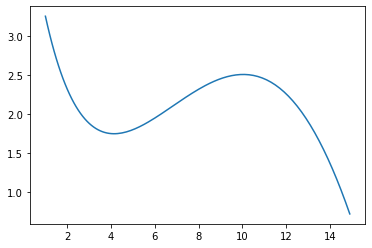

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib as plt
def f(x):
   return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

x_init = np.arange(1, 15, 0.1)
y_init = []
y_result = []

for i in x_init:
    y_init.append(f(i))
    
plt.pyplot.plot(x_init, y_init)
plt.pyplot.show()

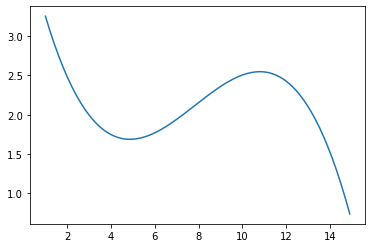

In [2]:
from scipy import linalg
x = [[1, 15], [1, 8, 15], [1, 4 , 10 ,15]]

def make_A(a):
    result = []
    for index, item in enumerate(a):
        result.append([])
        for i in range(len(a)):
            result[index].append(item**i)
    return result

def make_b(a):
    result = []
    for item in a:
        result.append(f(item))
    return result

result = []
for x_item in x:
    result.append(linalg.solve(make_A(x_item), make_b(x_item)))

def f_result(x):
    return result[2][0] + result[2][1] * x  + result[2][2] * (x**2)  + result[2][3] * (x**3)

for i in x_init:
    y_result.append(f_result(i))
    
plt.pyplot.plot(x_init, y_result)

In [3]:
result[2]

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])